# Depth normalisation

In [1]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from astropy.table import Table
plt.rcParams['figure.figsize'] = [12,7]

In [2]:
lc, lc_info = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_4_5/tesslc_234957922.pkl',sector=6)
lc = lc['time','corrected flux','quality','flux error']

In [3]:
def inject_lightcurve(time, flux, depth, injected_time, sigma, skewness):
    return flux * (
        1 - skewed_gaussian(time, depth, injected_time, sigma, skewness)
    )

In [4]:
test = inject_lightcurve(time=lc['time'], flux=lc['corrected flux'], depth=0.001, injected_time=1483, sigma=0.3, skewness=1)

In [5]:
lc2 = Table([lc['time'], test, lc['quality'], lc['flux error']], names=('time', 'corrected flux', 'quality', 'flux error'))

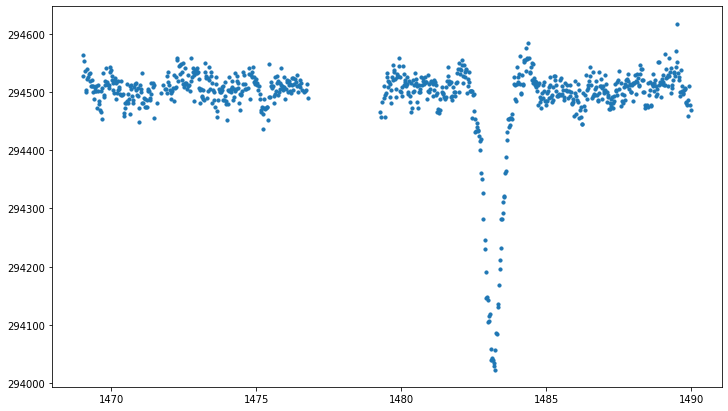

In [6]:
plt.scatter(lc2['time'],lc2['corrected flux'],s=10)

In [7]:
median = np.median(lc2['corrected flux'])
abs_depth = median - np.min(lc2['corrected flux'])  # Assuming the minimum of the lightcurve is the minimum point
normalised_lightcurve = (lc2['corrected flux'] - median) / abs_depth

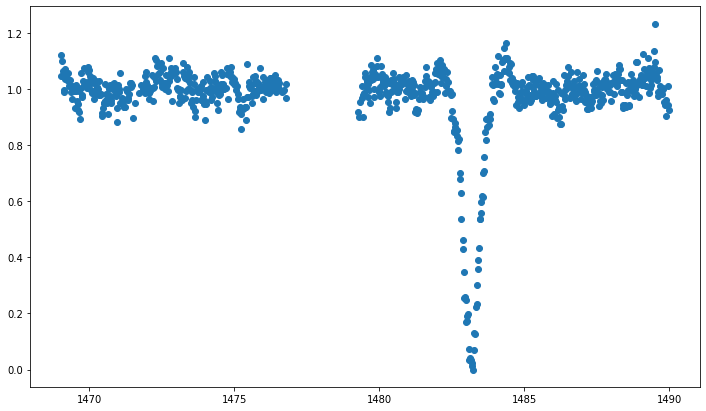

In [8]:
plt.scatter(lc2['time'],normalised_lightcurve+1)